In [1]:
import os
try:
    os.chdir(os.path.join(os.getcwd(), '..')) # '.' if the path is to current folder
    print(os.getcwd())
except:
    pass

/Users/RAUL.ALARES/Documents/src/clothes-extractor


In [2]:
from src.dataset import ClothesDataLoader, ClothesDataset
import matplotlib.pyplot as plt
from src.config import Config

In [3]:
!pwd

/Users/RAUL.ALARES/Documents/src/clothes-extractor


In [4]:
cfg = Config()
cfg.dataset_dir = "./data/zalando-hd-resized"
#cfg.dataset_mode = "train"
cfg.load_height = 1024
cfg.load_width = 768

clothes_dataset = ClothesDataset(cfg, "train")
clothes_loader = ClothesDataLoader(dataset=clothes_dataset, batch_size=cfg.batch_size)

In [5]:
result = clothes_dataset[3]
print('Imaname: ', result["img_name"])
print('mask_body_parts shape: ', result["mask_body_parts"].shape)
print('centered_mask_body shape: ', result["centered_mask_body"].shape)
print('reference_mask shape: ', result["reference_mask"].shape)
print('hide_mask shape: ', result["hide_mask"].shape)
print('composed_centered_mask_body shape: ', result["composed_centered_mask_body"].shape)
print('full_centered_mask_body shape: ', result["full_centered_mask_body"].shape)

# Similarly, we can sample a BATCH from the dataloader by running over its iterator
# iter_ = iter(clothes_loader)
# bimg, blabel = next(iter_)
# print('Batch Img shape: ', bimg.shape)
# print('Batch Label shape: ', blabel.shape)
# print('Batch Img shape: ', bimg.shape)
# print('Batch Label shape: ', blabel.shape)
# print(f'The Batched tensors return a collection of {bimg.shape[0]} grayscale images \
# ({bimg.shape[1]} channel, {bimg.shape[2]} height pixels, {bimg.shape[3]} width \
# pixels)')
# print(f'In the case of the labels, we obtain {blabel.shape[0]} batched integers, one per image')

Imaname:  00003_00.jpg
mask_body_parts shape:  torch.Size([3, 1024, 768])
centered_mask_body shape:  torch.Size([3, 1024, 768])
reference_mask shape:  torch.Size([1024, 768])
hide_mask shape:  torch.Size([1024, 768])
composed_centered_mask_body shape:  torch.Size([5, 1024, 768])
full_centered_mask_body shape:  torch.Size([1024, 768])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


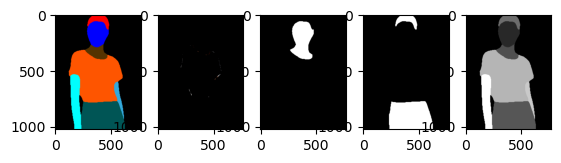

In [6]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
ax1.imshow(result["mask_body_parts"].permute(1,2,0))
ax2.imshow(result["centered_mask_body"].permute(1,2,0))
ax3.imshow(result["reference_mask"], cmap='gray')
ax4.imshow(result["hide_mask"], cmap='gray')
ax5.imshow(result["full_centered_mask_body"], cmap='gray')
